In [42]:
## Boston Housing Exercise

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
sns.set()
seed = 0
np.random.seed(seed)

In [44]:
from sklearn.datasets import load_boston

In [45]:
# Load the Boston Housing dataset from sklearn
boston = load_boston()
bos = pd.DataFrame(boston.data)
# give our dataframe the appropriate feature names
bos.columns = boston.feature_names
# Add the target variable to the dataframe
bos['Price'] = boston.target

In [46]:
#Getting the dimensions of the dataset
bos.shape

(506, 14)

In [47]:
#Checking top 15 rows of the data to observe the data
bos.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [48]:
# Checking the info of dataframe
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [49]:
#describing the dataset to get an idea about features
bos.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


Observations
* There are no null or NAN values in the dataset.
* Feature CH is a categorical variable.
* The third quantile of'RAD' varible is far from its median. To be further checked for outliers.
* Features 'TAX' and 'B' have high standard deviation, means that the numbers are more spread out.

### Our goal will be to predict the price of housing based on the feaures in this data set

In [50]:
# For student reference, the descriptions of the features in the Boston housing data set are listed below
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [51]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Exercise:  Use sklearn to fit a multiple linear regression model.  How will you decide which features to include?

In [52]:
#Importing Linear Regression and Mean Squared Error from Sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Create an object for Linear Regression class

reg = LinearRegression()


In [53]:
#Creating a function for train and test the data with Linear regression model

def train_and_test(df, model):
    
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    # Split the data into a train test split
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=seed, shuffle=True)
    
    model = model.fit(x_train, y_train)
    
    #Predicting values based on x_tests
    y_pred = model.predict(x_test)
    
    #R-Squared values for both Train and Test datasets
    r_squared_train = model.score(x_train,y_train)
    print("R-squared value of train              -", r_squared_train.round(2))
    r_squared_test = model.score(x_test,y_test)
    print("R-squared Value of test               -", r_squared_test.round(2))
    
    #Adjusted R-Squared values for both Train and Test datasets
    adj_r_squared_train = 1-(1-r_squared_train)*(1-x_train.shape[0])/(x_train.shape[0]-x_train.shape[1]-1)
    print("Adjusted R-Squared value of train data-", adj_r_squared_train.round(2))
    adj_r_squared_test = 1-(1-r_squared_test)*(1-x_test.shape[0])/(x_test.shape[0]-x_test.shape[1]-1)
    print("Adjusted R-Squared value of test data -", adj_r_squared_test.round(2))
    
    #Calculate Mean_Squared_Error
    print("Root Mean Squared Error Value         -",np.sqrt(mean_squared_error(y_test, y_pred)).round(2))
    print("\n\n")
    
    #Calling the coeefficient Table method
    coefficient_table(model, x_train)
    
    plt.scatter(y_pred,y_test)
    plt.title('predictions vs test plot', fontsize = 15)
    plt.xlabel('predictions')
    plt.ylabel('actuals')
    
    return model

In [98]:
#Creating a function to generate coefficient_table
def coefficient_table(model, train_data):
    
    coeff = pd.DataFrame(model.coef_)
    column_names = train_data.columns.values
    coef_table = pd.DataFrame(data = (column_names))
    coef_table = pd.concat([coef_table,coeff], axis = 1) 
    coef_table.columns = ['Feature_name','Coefficient']
    
    #Getting intercept value
    coef_table.index = coef_table.index+1
    coef_table.iloc[0] = ['Intercept',model.intercept_]
    
    #print(coef_table)
    
    return coef_table

R-squared value of train              - 0.77
R-squared Value of test               - 0.64
Adjusted R-Squared value of train data- 1.24
Adjusted R-Squared value of test data - 1.41
Root Mean Squared Error Value         - 5.46



   Feature_name  Coefficient
1     Intercept    36.933255
2            ZN     0.044017
3         INDUS    -0.005768
4          CHAS     2.393416
5           NOX   -15.589421
6            RM     3.768968
7           AGE    -0.007035
8           DIS    -1.434956
9           RAD     0.240081
10          TAX    -0.011297
11      PTRATIO    -0.985547
12            B     0.008444
13        LSTAT    -0.499117


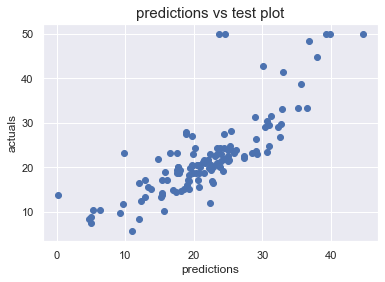

In [55]:
#Applying train_and_test definition on data
model = train_and_test(bos,reg)

Observations
* R-squared values for both train and test datasets are far from 1 and adjusted r-squared values are much higher than the R-Squared values for both Train and Test datasets. Therefore, we can conclude that our model is not the best yet.
* RMSE value for a good model should be closer to ZERO, while our current model has a value of 5.4. Hence our mode is not a good fit yet.
* This calls for more focus on feature engineering
* From the above coeffecient table it is evident that features such as 'INDUS, AGE & B have relatively lesser coefficeint values
* With coefficient values close to ZERO, the feature value would be nullified in the linear equation and will have very less influence on the predicted value.
* Another model to be tested without features like INDUS, AGE & B and see how model performs

Observations
* From the above coeffecient table it is evident that features such as 'INDUS, AGE & B have relatively lesser coefficeint values
* With coefficient values close to ZERO, the feature value would be nullified in the linear equation and will have very less influence on the predicted value.
* Another model to be tested without features like INDUS, AGE & B and see how model performs

### Can you improve upon your origninal model? 

#### Hint 1:  Look at the correlations of your features to your target - are there features you think are more important than others?  This is exploratory - just play with buildind different models

#### Hint 2:  Are there features you can engineer (categorical features based on binning the numeric features in the dataset) that may be useful?  How do you handle categorical features in MLR?

In [57]:
"""
#checking the correlation between variables
plt.figure(figsize=(15,10))
sns.heatmap(bos_corr[(bos_corr>=0.5)| (bos_corr<=-0.5)],annot=True,annot_kws={"size":14})
"""

'\n#checking the correlation between variables\nplt.figure(figsize=(15,10))\nsns.heatmap(bos_corr[(bos_corr>=0.5)| (bos_corr<=-0.5)],annot=True,annot_kws={"size":14})\n'

In [58]:
#checking the correlation between variables (rounded to 2 decimals)
plt.figure(figsize=(15,10))
corr = bos.corr().round(2)
corr.style.background_gradient(cmap = 'winter')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1,-0.2,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.06,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.06,-0.04,0.06,1,0.09,0.09,0.09,-0.1,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.1,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.01,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


<Figure size 1080x720 with 0 Axes>

Observations:
* Tax and RAD features have high correlation, therefore one of them can be removed
* AGE,NOX and DIS are moderately correlated, to be further examined.
* RM has strong positive correlation with 'Price' while LSTAT has strong negative correlation with 'Price'. Therefore, both variables are important


In [59]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

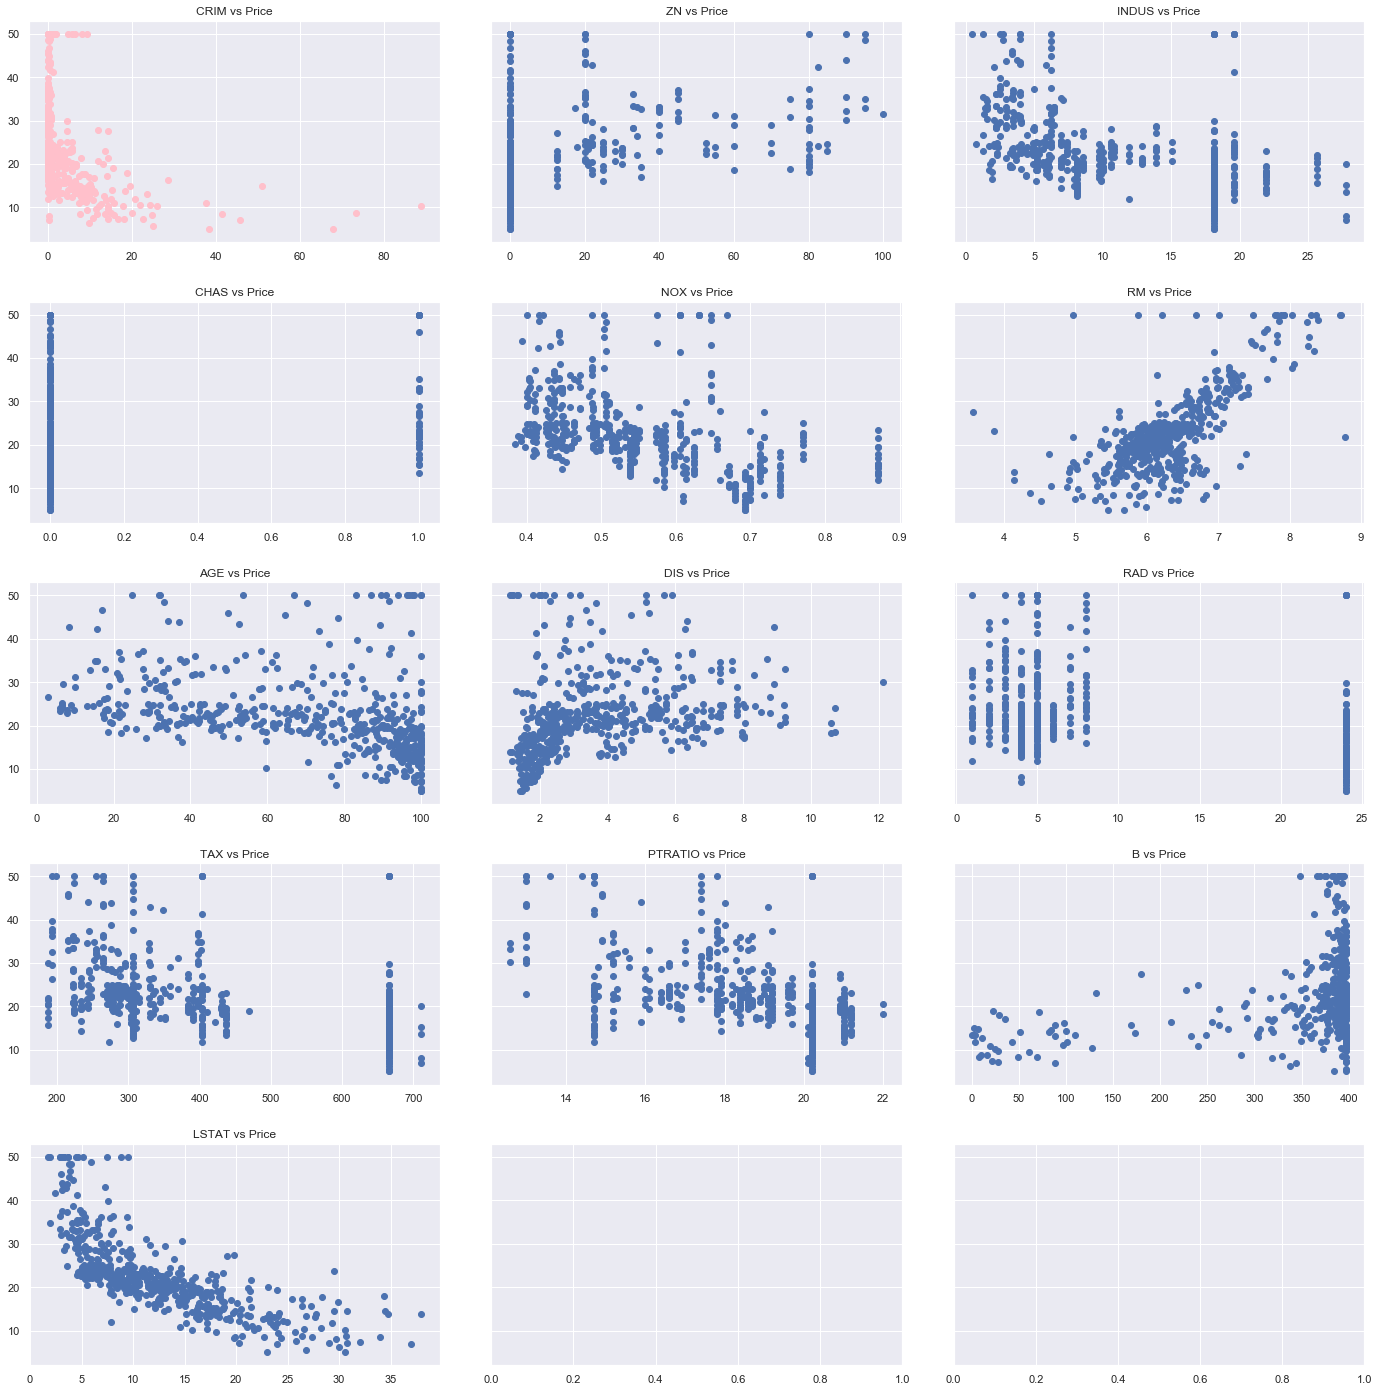

In [60]:
#Checking the relationship between PREDICTOR and TARGET variables using scatter plots
#This exercise will also help us to understand the 'type' of variables

fig,a = plt.subplots(5,3, figsize =(20,20), sharey = True)
fig.tight_layout(pad=3.0)
a[0][0].scatter(bos.CRIM,bos.Price, c= 'Pink')
a[0][0].title.set_text('CRIM vs Price')
a[0][1].scatter(bos.ZN,bos.Price)
a[0][1].title.set_text('ZN vs Price')
a[0][2].scatter(bos.INDUS,bos.Price)
a[0][2].title.set_text('INDUS vs Price')
a[1][0].scatter(bos.CHAS,bos.Price)
a[1][0].title.set_text('CHAS vs Price')
a[1][1].scatter(bos.NOX,bos.Price)
a[1][1].title.set_text('NOX vs Price')
a[1][2].scatter(bos.RM, bos.Price)
a[1][2].title.set_text('RM vs Price')
a[2][0].scatter(bos.AGE, bos.Price)
a[2][0].title.set_text('AGE vs Price')
a[2][1].scatter(bos.DIS, bos.Price)
a[2][1].title.set_text('DIS vs Price')
a[2][2].scatter(bos.RAD,bos.Price)
a[2][2].title.set_text('RAD vs Price')
a[3][0].scatter(bos.TAX, bos.Price)
a[3][0].title.set_text('TAX vs Price')
a[3][1].scatter(bos.PTRATIO, bos.Price)
a[3][1].title.set_text('PTRATIO vs Price')
a[3][2].scatter(bos.B, bos.Price)
a[3][2].title.set_text('B vs Price')
a[4][0].scatter(bos.LSTAT, bos.Price)
a[4][0].title.set_text('LSTAT vs Price')


* Variables such as CRIM, B and RAD have outliers and should be treated by removing the observations with those values. We will take a closer look at outliers with box plots
* Check the normality of features using histograms

### Make a scatterplot of the observations in the test data, where the x-axis is the actual price and the y axis is the predicted price from your favorite model.  What does this plot tell you about your regression model?

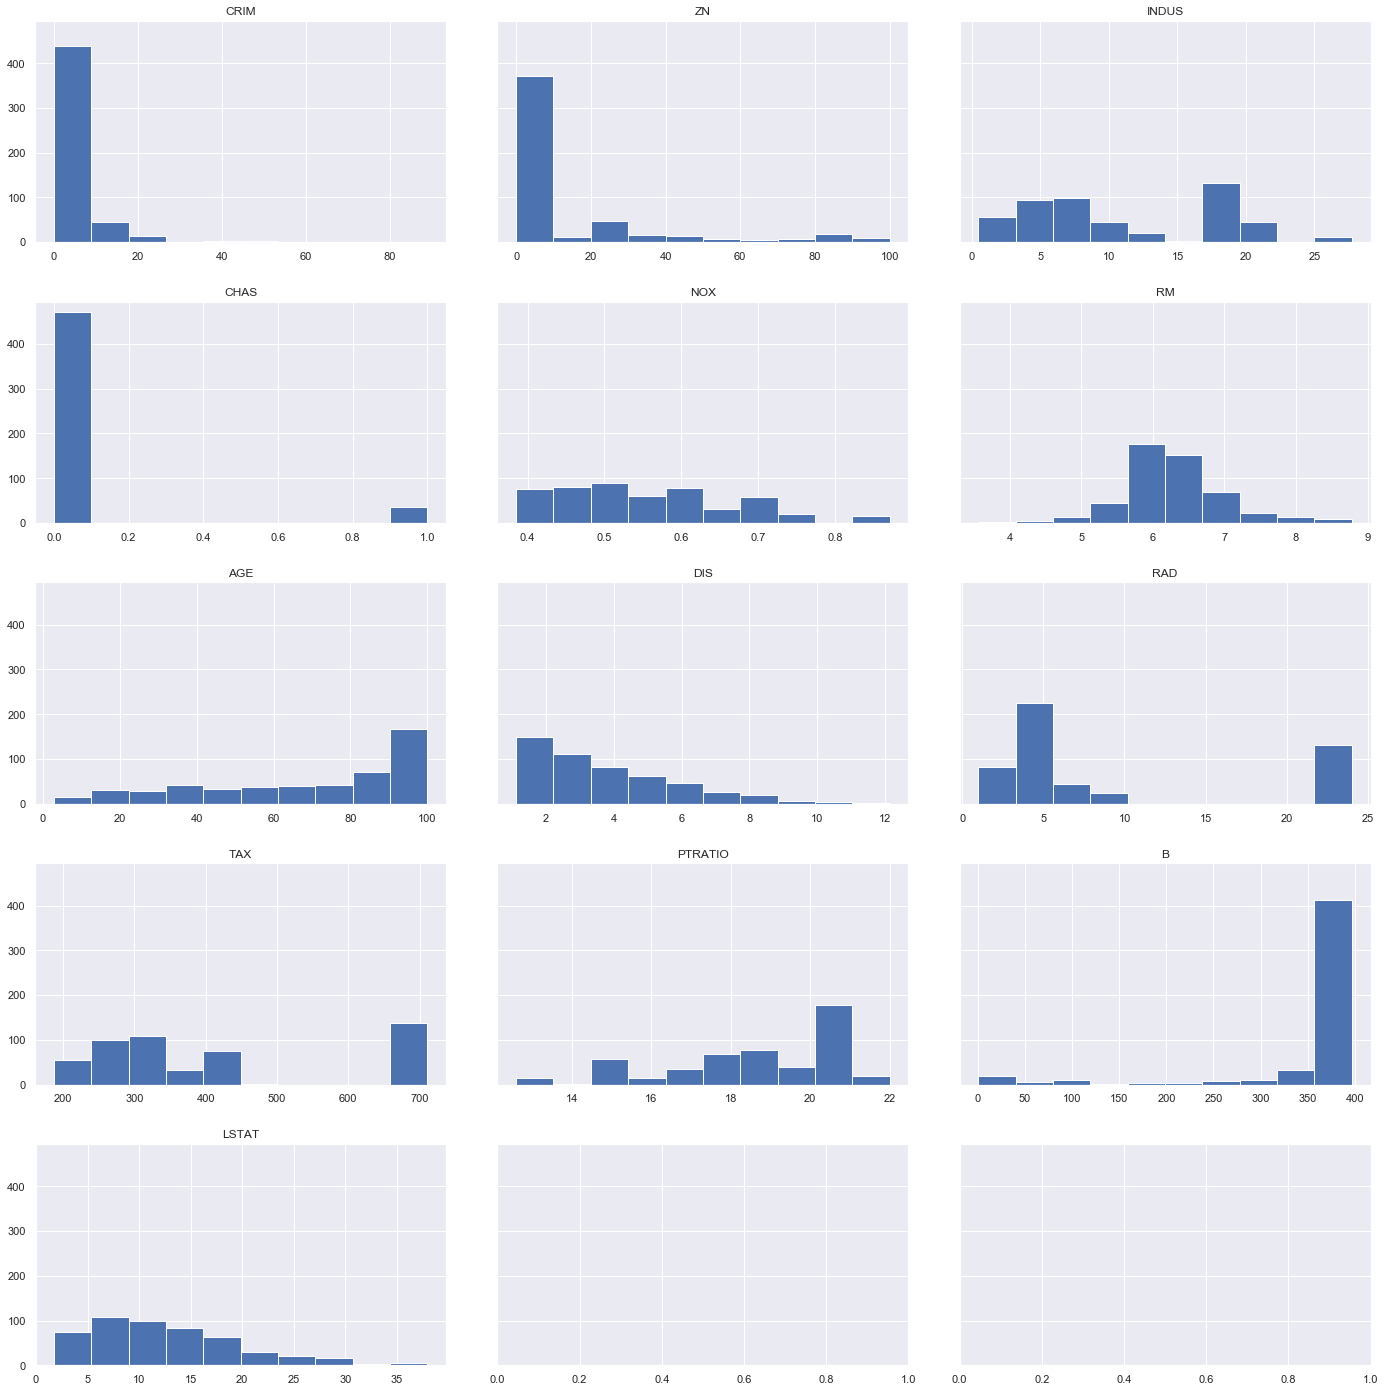

In [61]:
#Checking the normality of variables using histograms

fig2, an = plt.subplots(5, 3, figsize = (20,20), sharey = True)
fig2.tight_layout(pad=3.0)
an[0][0].hist(bos.CRIM)
an[0][0].title.set_text('CRIM')
an[0][1].hist(bos.ZN)
an[0][1].title.set_text('ZN')
an[0][2].hist(bos.INDUS)
an[0][2].title.set_text('INDUS')
an[1][0].hist(bos.CHAS)
an[1][0].title.set_text('CHAS')
an[1][1].hist(bos.NOX)
an[1][1].title.set_text('NOX')
an[1][2].hist(bos.RM)
an[1][2].title.set_text('RM')
an[2][0].hist(bos.AGE)
an[2][0].title.set_text('AGE')
an[2][1].hist(bos.DIS)
an[2][1].title.set_text('DIS')
an[2][2].hist(bos.RAD)
an[2][2].title.set_text('RAD')
an[3][0].hist(bos.TAX)
an[3][0].title.set_text('TAX')
an[3][1].hist(bos.PTRATIO)
an[3][1].title.set_text('PTRATIO')
an[3][2].hist(bos.B)
an[3][2].title.set_text('B')
an[4][0].hist(bos.LSTAT)
an[4][0].title.set_text('LSTAT')

* Except RM, none of the features are following normal distribution. 
* Therefore, all numeric variables (except RM) to be either scaled/normalized
* LSTAT has a few outliers at value '35'. Removing these outliers may improve the model.

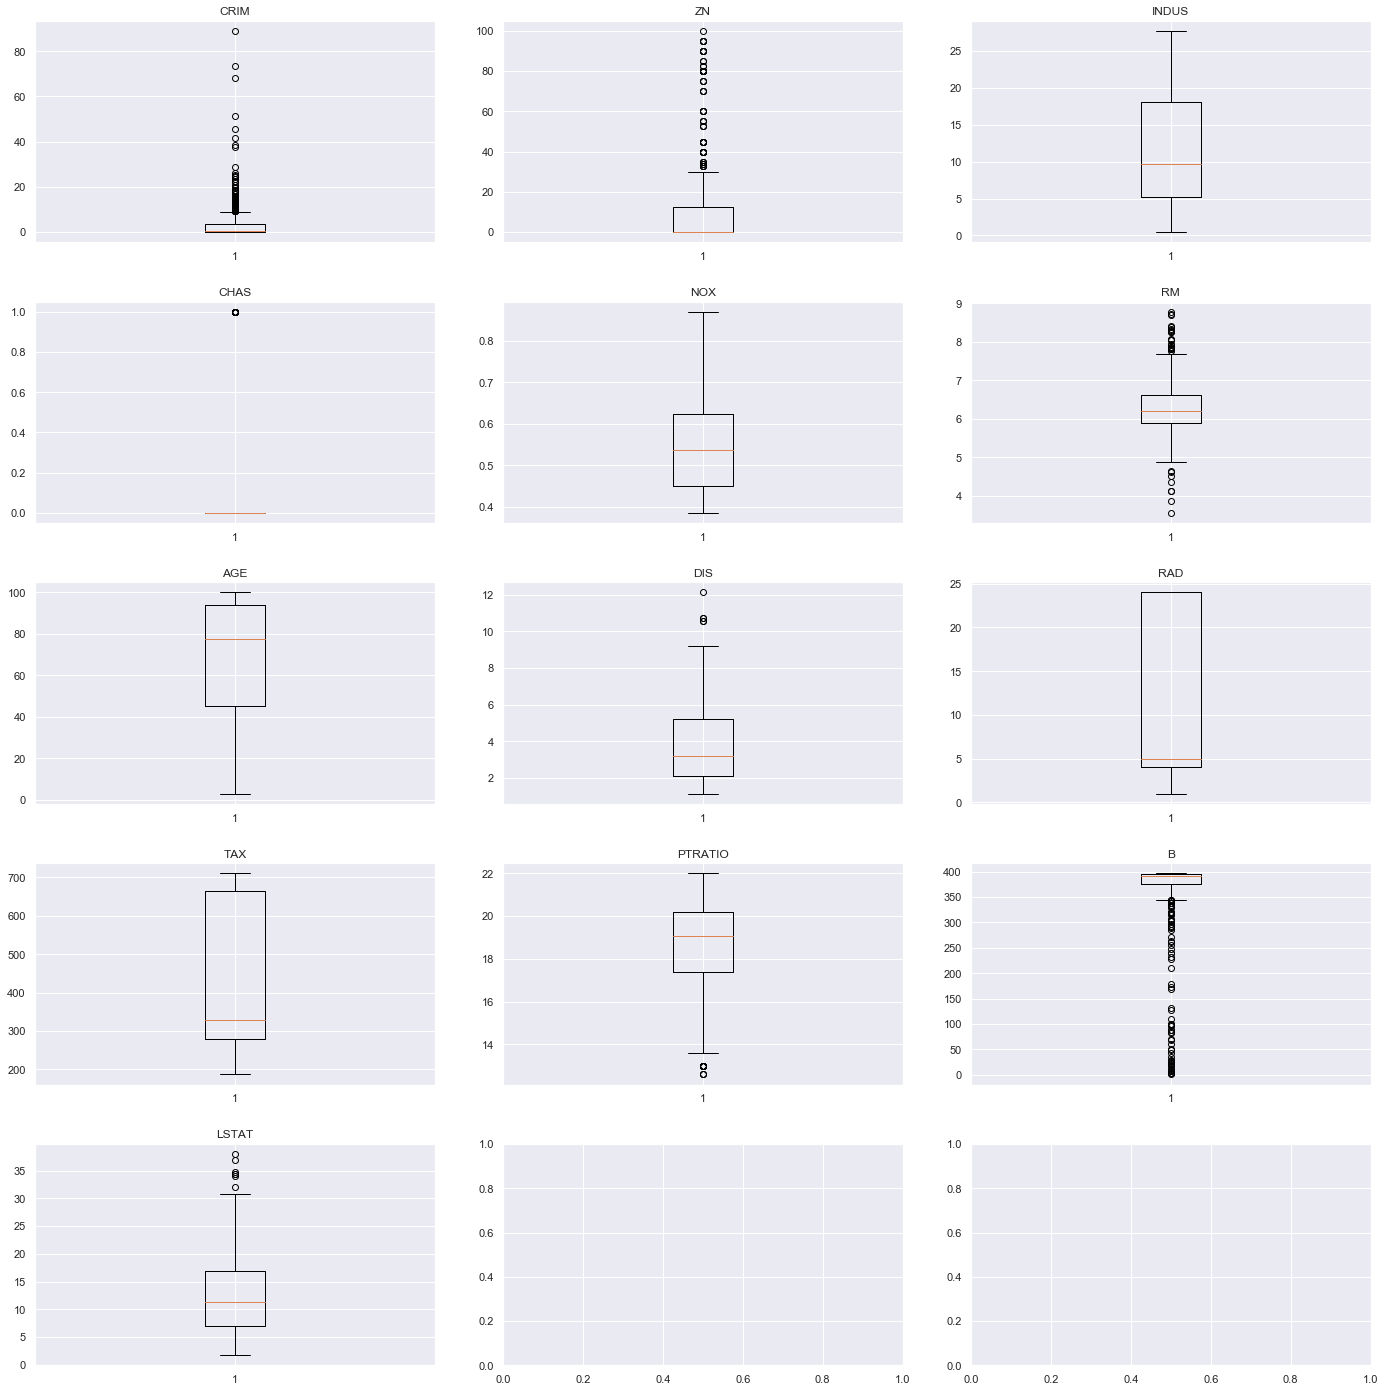

In [62]:
#Drawing Box Plots to understand about the outliers

fig3, an = plt.subplots(5, 3, figsize = (20,20))
fig3.tight_layout(pad=3.0)
an[0][0].boxplot(bos.CRIM)
an[0][0].title.set_text('CRIM')
an[0][1].boxplot(bos.ZN)
an[0][1].title.set_text('ZN')
an[0][2].boxplot(bos.INDUS)
an[0][2].title.set_text('INDUS')
an[1][0].boxplot(bos.CHAS)
an[1][0].title.set_text('CHAS')
an[1][1].boxplot(bos.NOX)
an[1][1].title.set_text('NOX')
an[1][2].boxplot(bos.RM)
an[1][2].title.set_text('RM')
an[2][0].boxplot(bos.AGE)
an[2][0].title.set_text('AGE')
an[2][1].boxplot(bos.DIS)
an[2][1].title.set_text('DIS')
an[2][2].boxplot(bos.RAD)
an[2][2].title.set_text('RAD')
an[3][0].boxplot(bos.TAX)
an[3][0].title.set_text('TAX')
an[3][1].boxplot(bos.PTRATIO)
an[3][1].title.set_text('PTRATIO')
an[3][2].boxplot(bos.B)
an[3][2].title.set_text('B')
an[4][0].boxplot(bos.LSTAT)
an[4][0].title.set_text('LSTAT')

Observations
* Variables such as 'B', 'RM','ZN','CRIM', 'DIS', 'PTRATIO' and LSTAT have outliers
* Outliers should be treated/removed to acheive better results

In [64]:
#Dropping RAD column due to higher correlation with TAX

bos_without_rad = bos.drop(['RAD'], axis = 1)
bos_without_rad.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [65]:
#Importing preprocessing library from sklearn package
from sklearn import preprocessing

#selecting the columns to be scaled except 'CHAS'(which is a categorical variable)

cols_to_be_standardized = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
bos_scaled = pd.DataFrame()

for column in cols_to_be_standardized:
    bos_scaled[column] = preprocessing.scale(bos_without_rad[column])

In [66]:
#bos_scaled dataframe has scaled variables

bos_scaled = pd.DataFrame(bos_scaled)
bos_scaled.head(15).round(2)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
0,-0.42,0.28,-1.29,-0.14,0.41,-0.12,0.14,-0.67,-1.46,0.44,-1.08
1,-0.42,-0.49,-0.59,-0.74,0.19,0.37,0.56,-0.99,-0.30,0.44,-0.49
2,-0.42,-0.49,-0.59,-0.74,1.28,-0.27,0.56,-0.99,-0.30,0.40,-1.21
3,-0.42,-0.49,-1.31,-0.84,1.02,-0.81,1.08,-1.11,0.11,0.42,-1.36
4,-0.41,-0.49,-1.31,-0.84,1.23,-0.51,1.08,-1.11,0.11,0.44,-1.03
5,-0.42,-0.49,-1.31,-0.84,0.21,-0.35,1.08,-1.11,0.11,0.41,-1.04
6,-0.41,0.05,-0.48,-0.27,-0.39,-0.07,0.84,-0.58,-1.51,0.43,-0.03
7,-0.40,0.05,-0.48,-0.27,-0.16,0.98,1.02,-0.58,-1.51,0.44,0.91
8,-0.40,0.05,-0.48,-0.27,-0.93,1.12,1.09,-0.58,-1.51,0.33,2.42
9,-0.40,0.05,-0.48,-0.27,-0.40,0.62,1.33,-0.58,-1.51,0.33,0.62


In [67]:
#Appending CHAS and Price variables to bos_scaled dataframe

bos_scaled['CHAS'] = bos_without_rad['CHAS']
bos_scaled['Price'] = bos_without_rad['Price']

In [68]:
#Checking  columns in bos_scaled DataFrame

bos_scaled.columns

Index(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B',
       'LSTAT', 'CHAS', 'Price'],
      dtype='object')

In [69]:
bos_without_outlier = bos.copy()

In [70]:
from scipy import stats
z = np.abs(stats.zscore(bos_without_rad[cols_to_be_standardized]))

In [71]:
boston_without_outliers_z_score = bos_without_rad[(z < 3).all(axis=1)]

In [72]:
boston_without_outliers_z_score.shape

(448, 13)

In [73]:
Q1 = bos.quantile(0.25)
Q3 = bos.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
Price        7.975000
dtype: float64


# Removing outliers using Inter Quantile range

In [74]:
boston_without_outliers_IQR = bos_without_rad[~((bos_without_rad < (Q1 - 1.5 * IQR)) |(bos_without_rad > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_without_outliers_IQR.shape

(268, 13)

Now we have two data frames for which outlier treatment has been done.
we apply linear regression on both the datasets to see how better is our model performing

In [75]:
# Select target (y) and features (X)
X2 = boston_without_outliers_IQR.iloc[:,:-1]
y2 = boston_without_outliers_IQR.iloc[:,-1]
# Split the data into a train test split
x2_train, x2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.25, random_state=seed, shuffle=True)

R-squared value of train              - 0.69
R-squared Value of test               - 0.62
Adjusted R-Squared value of train data- 1.33
Adjusted R-Squared value of test data - 1.46
Root Mean Squared Error Value         - 2.7



   Feature_name   Coefficient
1     Intercept  7.542989e+00
2            ZN -2.478162e-02
3         INDUS -3.960716e-02
4          CHAS  3.302913e-15
5           NOX -2.481869e+00
6            RM  5.538454e+00
7           AGE -5.303594e-02
8           DIS -6.256516e-01
9           TAX -6.297230e-03
10      PTRATIO -4.872955e-01
11            B  2.756038e-03
12        LSTAT -1.749763e-01


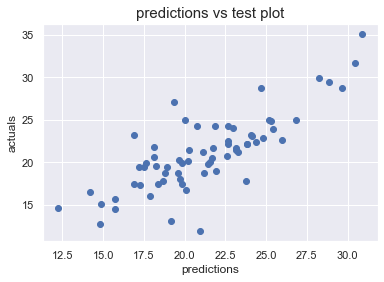

In [76]:
reg2 = LinearRegression() 
model2 = train_and_test(boston_without_outliers_IQR, reg2)

RMSE value has decreased

Adj. R-squared value has increased

R-Squared has decreased

In [79]:
"""
#Comparing Coefficient values for both models
coef_table2['Coefficient_naive_LR'] = coef_table['Coefficient']
coef_table2.columns = ['Feature_name', 'Coefficient post FE', 'Coefficient_naive_LR' ]
coef_table2
"""

"\n#Comparing Coefficient values for both models\ncoef_table2['Coefficient_naive_LR'] = coef_table['Coefficient']\ncoef_table2.columns = ['Feature_name', 'Coefficient post FE', 'Coefficient_naive_LR' ]\ncoef_table2\n"

No significant change in coefficient values

Remove CHAS, TAX and B and Try model Again

In [80]:
boston_trail3 = boston_without_outliers_IQR.drop(['CHAS', 'TAX', 'B'], axis = 1)
boston_trail3

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,PTRATIO,LSTAT,Price
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,21.0,6.48,22.0


R-squared value of train              - 0.68
R-squared Value of test               - 0.64
Adjusted R-Squared value of train data- 1.34
Adjusted R-Squared value of test data - 1.41
Root Mean Squared Error Value         - 2.63



  Feature_name  Coefficient
1    Intercept     8.717028
2           ZN    -0.025548
3        INDUS    -0.087836
4          NOX    -2.727941
5           RM     5.450860
6          AGE    -0.053518
7          DIS    -0.626752
8      PTRATIO    -0.535617
9        LSTAT    -0.173731


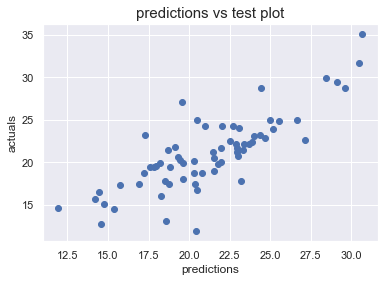

In [83]:
reg3 = LinearRegression()
model_3 = train_and_test(boston_trail3, reg3)

R-squared value of train              - 0.73
R-squared Value of test               - 0.69
Adjusted R-Squared value of train data- 1.28
Adjusted R-Squared value of test data - 1.35
Root Mean Squared Error Value         - 5.21



   Feature_name  Coefficient
1     Intercept    17.078053
2            ZN     0.001773
3         INDUS     0.018052
4          CHAS     3.425378
5           NOX   -12.241575
6            RM     5.701887
7           AGE    -0.036008
8           DIS    -1.387827
9           TAX    -0.001670
10      PTRATIO    -0.703368
11            B     0.007753
12        LSTAT    -0.454336


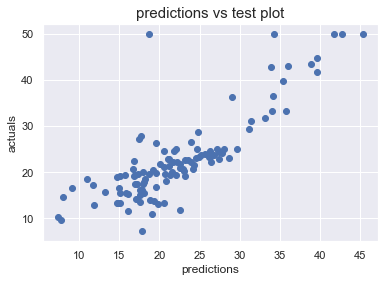

In [84]:
#Using the dataframe with outliers removed using z_score
reg4 = LinearRegression()
model_4 = train_and_test(boston_without_outliers_z_score, reg4)

so far we acheived better results with 'boston_trail3' dataset, which has some features removed based on their initial coeffecient values.
Let's try Cross validating the 'boston_trail3' dataset and see how this model works 

# Applying Cross Validation

R-squared value of train              - 0.68
R-squared Value of test               - 0.64
Adjusted R-Squared value of train data- 1.34
Adjusted R-Squared value of test data - 1.41
Root Mean Squared Error Value         - 2.63



  Feature_name  Coefficient
1    Intercept     8.717028
2           ZN    -0.025548
3        INDUS    -0.087836
4          NOX    -2.727941
5           RM     5.450860
6          AGE    -0.053518
7          DIS    -0.626752
8      PTRATIO    -0.535617
9        LSTAT    -0.173731


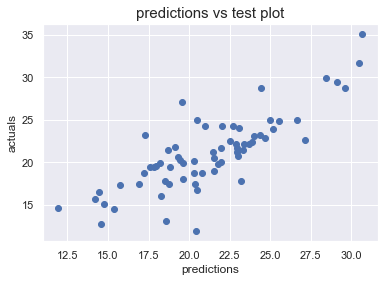

In [86]:
from sklearn.model_selection import cross_val_score
    
    #X = boston_trail3.iloc[:,:-1]
    #y = boston_trail3.iloc[:,-1]
    # Split the data into a train test split
    #x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = seed, shuffle=True)
    
    #model = model.fit(x_train, y_train)
reg_cv = train_and_test(boston_trail3, reg3)

In [87]:
scores = cross_val_score(reg_cv, boston_trail3.iloc[:,:-1],boston_trail3.iloc[:,-1], cv = 10)
scores.mean()

0.3040845246767436

applying cross validation may not be a viable option as it can work better on classification problems but not on regression problems

# Testing Ridge Regression

In [88]:
X = boston_trail3.iloc[:,:-1]
y = boston_trail3.iloc[:,-1]
#Split the data into a train test split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = seed, shuffle=True)

In [107]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 3.0)
ridge.fit(x_train,y_train)

Ridge(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [109]:
y_pred_train = ridge.predict(x_train)
y_pred_test = ridge.predict(x_test)

error = y_pred-y_test

 #R-Squared values for both Train and Test datasets
r_squared_train = ridge.score(x_train,y_train)
print("R-squared value of train              -", r_squared_train.round(2))
r_squared_test = ridge.score(x_test,y_test)
print("R-squared Value of test               -", r_squared_test.round(2))
    
#Adjusted R-Squared values for both Train and Test datasets
adj_r_squared_train = 1-(1-r_squared_train)*(1-x_train.shape[0])/(x_train.shape[0]-x_train.shape[1]-1)
print("Adjusted R-Squared value_train        -", adj_r_squared_train.round(2))
adj_r_squared_test = 1-(1-r_squared_test)*(1-x_test.shape[0])/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R-Squared value_test         -", adj_r_squared_test.round(2))
    
#Calculate Mean_Squared_Error
print("Root Mean Squared Error Value_Train   -",np.sqrt(mean_squared_error(y_train, y_pred_train)).round(2))
print("Root Mean Squared Error Value_Test    -",np.sqrt(mean_squared_error(y_test, y_pred_test)).round(2))
print("\n")
    
#Calling the coeefficient Table method

coefficient_table(ridge, x_train)

R-squared value of train              - 0.68
R-squared Value of test               - 0.64
Adjusted R-Squared value_train        - 1.34
Adjusted R-Squared value_test         - 1.42
Root Mean Squared Error Value_Train   - 2.73
Root Mean Squared Error Value_Test    - 2.64




,Feature_name,Coefficient
1,Intercept,11.610298
2,ZN,-0.024300
3,INDUS,-0.093171
4,NOX,-0.446864
5,RM,4.756352
6,AGE,-0.051359
7,DIS,-0.558967
8,PTRATIO,-0.511829
9,LSTAT,-0.226284


# Tried various values of lambda or Alpha, but the model was giving the same result

R-squared value of train              - 0.68

R-squared Value of test               - 0.64

Adjusted R-Squared value_train        - 1.34

Adjusted R-Squared value_test         - 1.41

Root Mean Squared Error Value_Train   - 2.72

Root Mean Squared Error Value_Test    - 2.63

# Lasso Regression

In [120]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [121]:
y_pred_train = lasso.predict(x_train)
y_pred_test = lasso.predict(x_test)

error = y_pred-y_test

 #R-Squared values for both Train and Test datasets
r_squared_train = lasso.score(x_train,y_train)
print("R-squared value of train              -", r_squared_train.round(2))
r_squared_test = lasso.score(x_test,y_test)
print("R-squared Value of test               -", r_squared_test.round(2))
    
#Adjusted R-Squared values for both Train and Test datasets
adj_r_squared_train = 1-(1-r_squared_train)*(1-x_train.shape[0])/(x_train.shape[0]-x_train.shape[1]-1)
print("Adjusted R-Squared value_train        -", adj_r_squared_train.round(2))
adj_r_squared_test = 1-(1-r_squared_test)*(1-x_test.shape[0])/(x_test.shape[0]-x_test.shape[1]-1)
print("Adjusted R-Squared value_test         -", adj_r_squared_test.round(2))
    
#Calculate Mean_Squared_Error
print("Root Mean Squared Error Value_Train   -",np.sqrt(mean_squared_error(y_train, y_pred_train)).round(2))
print("Root Mean Squared Error Value_Test    -",np.sqrt(mean_squared_error(y_test, y_pred_test)).round(2))
print("\n")
    
#Calling the coeefficient Table method

coefficient_table(lasso, x_train)

R-squared value of train              - 0.52
R-squared Value of test               - 0.45
Adjusted R-Squared value_train        - 1.5
Adjusted R-Squared value_test         - 1.64
Root Mean Squared Error Value_Train   - 3.32
Root Mean Squared Error Value_Test    - 3.28




,Feature_name,Coefficient
1,Intercept,33.272422
2,ZN,-0.021672
3,INDUS,-0.038548
4,NOX,-0.000000
5,RM,0.000000
6,AGE,-0.024978
7,DIS,-0.000000
8,PTRATIO,-0.188329
9,LSTAT,-0.517995


So far, the ridge regression on the data frame after removing three columns gave the best result as mentioned below

Root Mean Squared Error Value_Train - 2.72

Root Mean Squared Error Value_Test - 2.63